# Machine Learning

## Modell

Ein Modell ist ein Programm, dass von einem Algorithmus generiert wird (im Gegensatz zu geschrieben von uns selber). Dieses wird auf einem Datenset basierend erstellt. Der Algorithmus erkennt Zusammenhänge im Datenset und erstellt daraus das Model -> Machine Learning

Diesem Modell können später neue Datensätze gegeben werden, und daraus wird eine Vorhersage getroffen

## Beispiel: Wettermodell

Datenset: 30 Jahre historische Wetterdaten

4 Spalten: Datum (Tage), Uhrzeit, Niederschlag (%), Wolken (%), Temperatur

Input: 11.09., 13:00, 0%, 20% -> 25°C

Input: 11.01., 13:00, 0%, 20% -> 10°C

Über das Datenset wird das Modell trainiert

Danach kann der Input von hier gefüttert werden, um eine Temperaturvorhersage zu treffen

## Datenset

Das MAGIC Gamma Telescope Set besteht aus Daten zu Partikeln, die das Teleskop treffen. Der Rekorder zeichnet auf, welche Eigenschaften diese Partikel haben und klassifiziert diese.

2 Partikel:

- Gamma Strahlen
- Hadronen

Mithilfe von Machine Learning können wir ein Modell aufbauen, dass anhand der Daten selbstständig Vorhersagen trifft, um welche Partikel es sich handelt.

Beschreibung des Datensets:

- fLength: continuous # major axis of ellipse [mm]
- fWidth: continuous # minor axis of ellipse [mm]
- fSize: continuous # 10-log of sum of content of all pixels [in #phot]
- fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
- fConc1: continuous # ratio of highest pixel over fSize [ratio]
- fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
- fM3Long: continuous # 3rd root of third moment along major axis [mm]
- fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
- fAlpha: continuous # angle of major axis with vector to origin [deg]
- fDist: continuous # distance from origin to center of ellipse [mm]
- class: g,h # gamma (signal), hadron (background)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/MAGIC.csv")

In [3]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


Ein Machine Learning Algorithmus kann nicht mit Buchstaben arbeiten -> Umwandlung in Zahlen

In [4]:
df["class"] == "g"

0         True
1         True
2         True
3         True
4         True
         ...  
19015    False
19016    False
19017    False
19018    False
19019    False
Name: class, Length: 19020, dtype: bool

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


## Abweichungen zwischen Partikeln feststellen

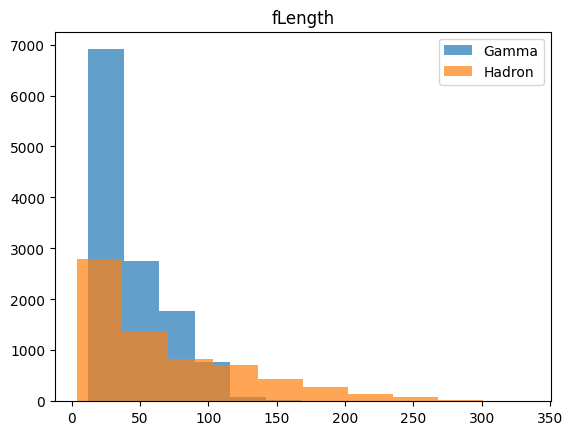

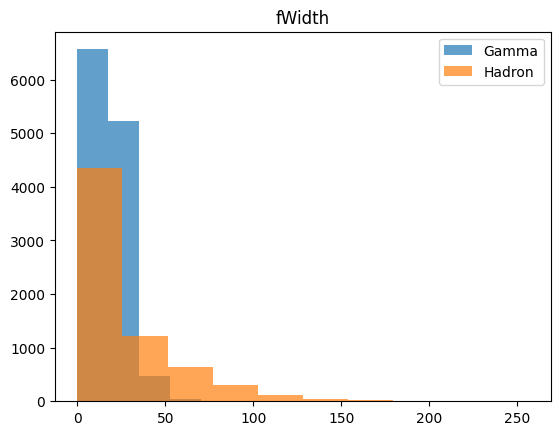

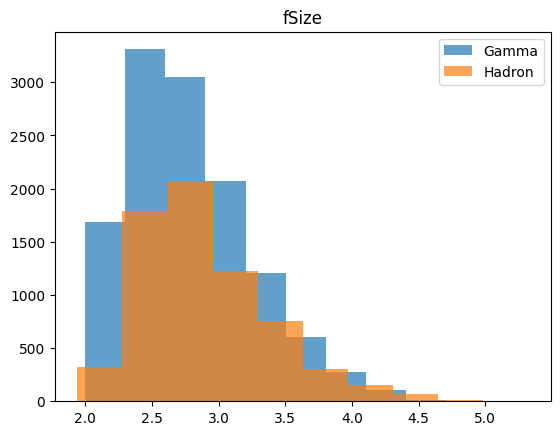

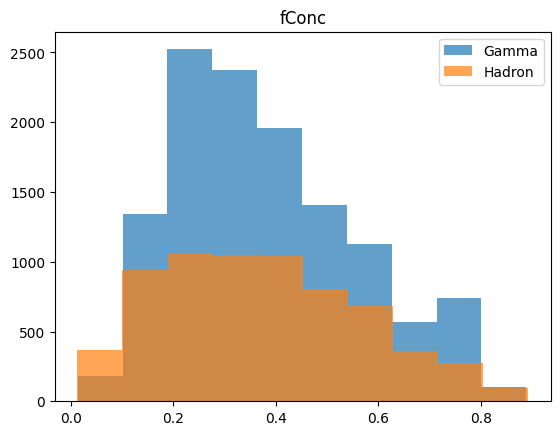

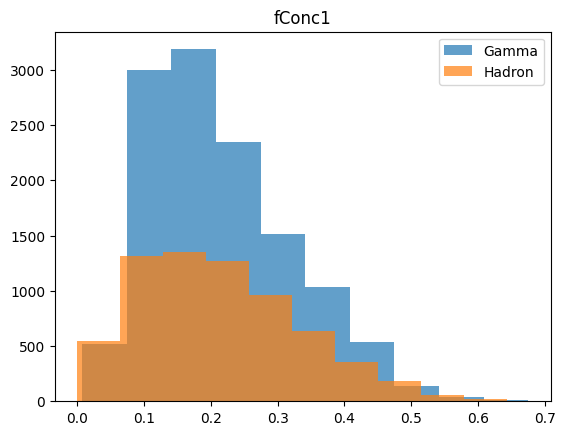

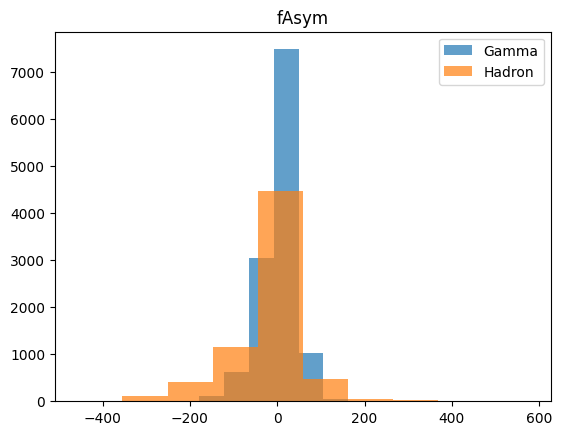

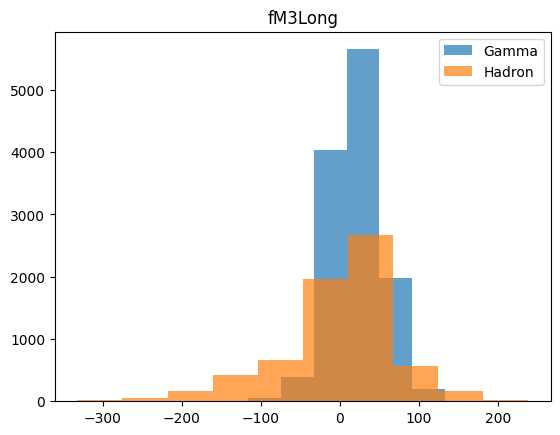

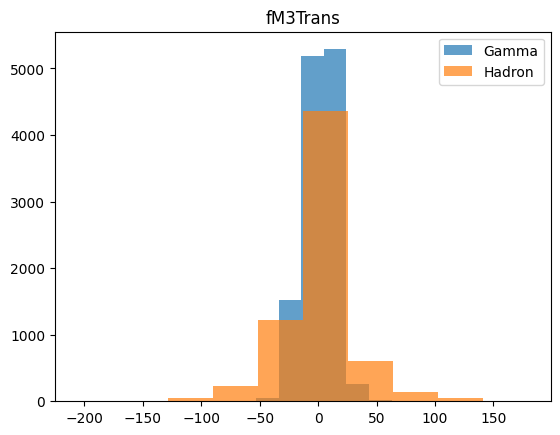

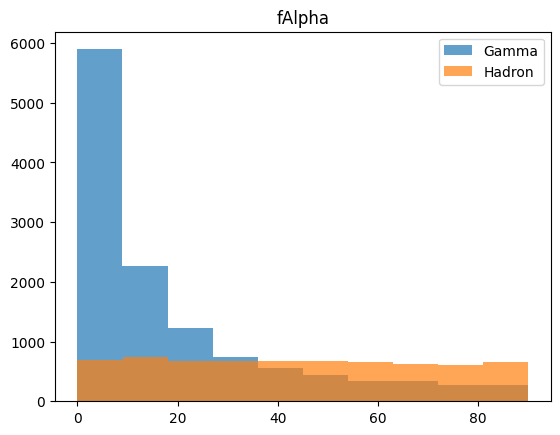

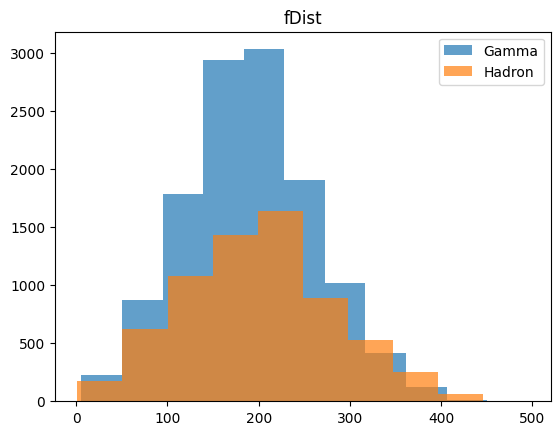

In [7]:
for column in df.columns[:-1]:
    plt.hist(df[df["class"] == 1][column], label="Gamma", alpha=0.7)
    plt.hist(df[df["class"] == 0][column], label="Hadron", alpha=0.7)
    plt.title(column)
    plt.legend()
    plt.show()

## Vorbereitung des Datensets

Wir müssen jetzt das Datenset in Trainings-, Test-, und Validierungsdaten aufteilen.

Dafür können wir das Gesamtset nehmen und aufteilen

In [8]:
np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

C:\Users\lk3\source\repos\Python_DataScience_2023_09_11\venv\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
 17465   98.1619   15.3418  3.1689  0.1776  0.0912   51.0349   58.9549   
 14456   93.3517   15.7921  2.5888  0.4009  0.1972  -63.6609  -78.6656   
 8139    41.3260   15.8124  2.6479  0.3127  0.1609  -15.2693   19.7499   
 13496  233.0390  201.3640  4.3820  0.0507  0.0336 -239.3372 -217.8321   
 6106    60.1899   20.8679  3.2515  0.2146  0.1112   49.4347   55.9689   
 ...         ...       ...     ...     ...     ...       ...       ...   
 196     42.1441   13.7346  2.7459  0.3339  0.1966   31.7383   19.1549   
 8138    12.9935   11.0298  2.3149  0.7506  0.4479  -14.2100    6.4590   
 7616    80.8604   19.5553  3.0026  0.3519  0.2609  -83.1037   46.2738   
 910     92.5950   24.5334  3.1670  0.2056  0.1059  -30.6767   79.5929   
 15582   13.0278   10.5102  2.3683  0.7709  0.5032  -12.8741   -4.6312   
 
        fM3Trans   fAlpha     fDist  class  
 17465   12.9075  86.1812  177.7080      0  
 14456  -14.3537  61

In [9]:
training, validierung, test = np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

C:\Users\lk3\source\repos\Python_DataScience_2023_09_11\venv\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
len(training.groupby("class").get_group(1))

7430

In [11]:
len(training.groupby("class").get_group(0))

3982

## Standardisierung der Daten

Wir müssen erstmal die Daten standardisieren, nachdem das Datenset verstreut ist (Menge der G und H ist ungleich, Werte sind zu klein/groß)

RandomOverSampler

- Generiert neue zufällige Daten um das Datenset auszugleichen
- Algorithmus kann besser lernen, wenn das Datenset gleichmäßig ist (keine Lehnung in eine bestimmte Richtung -> Bias)

StandardScaler

- "Glättet" das Datenset (entfernt Outlier)
- Verringert und Erhöht große/kleine Werte um den Prozess des Lernens zu vereinfachen

LabelEncoder

- Ermöglicht das Umwandeln von Texten zu numerischen Werten
- Machine Learning Algorithmen können nicht mit Texten umgehen

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
dataToScale = training[training.columns[:-1]].values

In [15]:
dataToScale  # Vor Skalierung

array([[ 19.2665,  15.6173,   2.5211, ...,  -6.9701,  82.2507,  37.6749],
       [ 26.5702,  14.7651,   2.3874, ...,   9.6575,  45.9686, 232.161 ],
       [ 33.4439,  18.4405,   3.0013, ...,   9.1591,   5.6137, 241.962 ],
       ...,
       [ 74.0956,  31.6713,   3.2017, ...,  23.0124,  23.727 , 286.242 ],
       [ 80.5879,  32.6355,   3.6311, ...,  17.2874,   2.7956, 210.673 ],
       [ 23.3724,  10.9488,   2.316 , ...,   5.3886,   7.1894, 176.713 ]])

In [16]:
dataToScale = scaler.fit_transform(dataToScale)

In [17]:
dataToScale  # Nach Skalierung

array([[-0.80097892, -0.36774394, -0.64381368, ..., -0.34181888,
         2.09422186, -2.09481598],
       [-0.62987787, -0.41451729, -0.92664268, ...,  0.45676479,
         0.70113252,  0.51059637],
       [-0.46885026, -0.21279147,  0.37200145, ...,  0.43282784,
        -0.84833624,  0.64189443],
       ...,
       [ 0.48348195,  0.51338636,  0.79592763, ...,  1.09816854,
        -0.15285707,  1.23508674],
       [ 0.63557464,  0.56630687,  1.70428044, ...,  0.82321055,
        -0.95654015,  0.22273467],
       [-0.70479154, -0.62397646, -1.07768224, ...,  0.25173978,
        -0.78783558, -0.23220686]])

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
sampler = RandomOverSampler()

In [20]:
x, y = sampler.fit_resample(dataToScale, training[training.columns[-1]])

In [21]:
x

array([[-0.80097892, -0.36774394, -0.64381368, ..., -0.34181888,
         2.09422186, -2.09481598],
       [-0.62987787, -0.41451729, -0.92664268, ...,  0.45676479,
         0.70113252,  0.51059637],
       [-0.46885026, -0.21279147,  0.37200145, ...,  0.43282784,
        -0.84833624,  0.64189443],
       ...,
       [-0.18713804,  0.32757182,  0.16384608, ..., -1.1335346 ,
        -0.77979161, -1.48338448],
       [-0.77425149, -0.74884076, -1.58135901, ..., -0.40238168,
         0.35324127,  0.36761131],
       [ 2.47894799,  2.95418974,  3.05834805, ..., -2.02607465,
         1.99344374,  2.39800088]])

In [22]:
y

0        0
1        1
2        1
3        0
4        0
        ..
14855    0
14856    0
14857    0
14858    0
14859    0
Name: class, Length: 14860, dtype: int32

In [23]:
len(x)

14860

In [24]:
len(y)

14860

In [25]:
data = np.hstack((x, np.array(y).reshape(-1, 1)))

In [26]:
data = pd.DataFrame(data)

In [27]:
data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.800979,-0.367744,-0.643814,0.391636,0.308479,0.076576,-0.313410,-0.341819,2.094222,-2.094816,0.0
1,-0.629878,-0.414517,-0.926643,0.408582,0.451746,0.143189,0.234111,0.456765,0.701133,0.510596,1.0
2,-0.468850,-0.212791,0.372001,-0.579204,-0.493997,0.137535,-0.666534,0.432828,-0.848336,0.641894,1.0
3,-0.437437,-0.375889,-0.092540,0.318386,0.039174,0.282649,0.422695,-0.531331,0.273700,-0.725830,0.0
4,2.182414,2.521748,1.221546,-1.278361,-1.100614,-2.996554,1.960931,-2.131644,-0.970040,0.799356,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14855,-0.863088,-0.776887,-1.238876,2.161122,2.121078,0.123952,-0.055393,0.331509,1.869355,0.042225,0.0
14856,0.761352,1.770844,1.421663,-1.420488,-1.131444,-1.076831,-1.240487,1.905757,2.388259,0.740134,0.0
14857,-0.187138,0.327572,0.163846,-0.806607,-1.087013,-0.313623,-0.432763,-1.133535,-0.779792,-1.483384,0.0
14858,-0.774251,-0.748841,-1.581359,1.970343,2.091156,-0.271319,0.195878,-0.402382,0.353241,0.367611,0.0


In [28]:
len(data.groupby(10).get_group(1))

7430

In [29]:
len(data.groupby(10).get_group(0))

7430

Jetzt müssen alle Datensets skaliert und möglicherweise Oversampled werden

Dafür bietet sich eine Funktion an

In [30]:
def scale_dataset(data, oversample=False):
    left = data[data.columns[:-1]].values
    right = data[data.columns[-1]].values

    scaler = StandardScaler()
    left = scaler.fit_transform(left)

    if oversample:
        sampler = RandomOverSampler()
        left, right = sampler.fit_resample(left, right)

    data = np.hstack((left, np.array(right).reshape(-1, 1)))
    return data, left, right

In [31]:
training, left_train, right_train = scale_dataset(training, True)
validierung, left_valid, right_valid = scale_dataset(validierung, False)
test, left_test, right_test = scale_dataset(test, False)

In [32]:
len(pd.DataFrame(training).groupby(10).get_group(1))

7430

In [33]:
len(pd.DataFrame(training).groupby(10).get_group(0))

7430

## Verschiedene Algorithmen/Modelle

kNN (k-nearest Neighbors)
- Beispiel: hat X/hat nicht X
- Punkten werden auf einem Koordinatensystem eingetragen
- Jeder Punkt hat eine Position
- Unbekannte sollen jetzt klassifiziert werden anhand von bestehden Punkten (Nachbarn)
- Es werden die nähesten Punkte gesucht und daraufhin wird gezählt wieviele A-Punkte und wieviele B-Punkte am nähesten sind
- Die höhere Anzahl ist die neue Klasse des neuen Punkts

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [36]:
knn_model.fit(left_train, right_train)  # left_train und right_train auf das Modell anpassen, left: Daten ohne Class, right: nur die Class

KNeighborsClassifier()

In [37]:
right_pred = knn_model.predict(left_test)

In [38]:
predictions = pd.DataFrame(np.hstack((left_test, right_pred.reshape(-1, 1), right_test.reshape(-1, 1))))

In [39]:
predictions

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,0.0,1.0
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1.0,1.0
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1.0,1.0
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1.0,1.0
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,0.0,1.0
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1.0,1.0
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1.0,1.0
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1.0,1.0


In [40]:
predictions[10] == predictions[11]

0       False
1        True
2        True
3        True
4        True
        ...  
3799    False
3800     True
3801     True
3802     True
3803    False
Length: 3804, dtype: bool

In [41]:
(predictions[10] == predictions[11]).sum()  # Anzahl True Werte

3114

In [42]:
3804 - 3112  # Anzahl False Werte

692

In [43]:
3112 / 3804  # Prozentuale Genauigkeit

0.8180862250262881

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(right_test, right_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1324
           1       0.85      0.87      0.86      2480

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [46]:
def showPrediction(left_test, right_test, right_pred):
    data = pd.DataFrame(left_test)
    data["Actual"] = right_test
    data["Prediction"] = right_pred
    return data

In [47]:
showPrediction(left_test, right_test, right_pred)

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,0
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,1
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,1
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,1
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,0
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,1
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,1
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,1


In [48]:
def eval(data):
    counts = (data["Actual"] == data["Prediction"]).value_counts()
    print(f"Accuracy: {counts[True] / len(data)}")
    print(f"Wrong Points: {counts[False] / len(data)}")

In [49]:
eval(showPrediction(left_test, right_test, right_pred))

Accuracy: 0.8186119873817035
Wrong Points: 0.18138801261829654


## Naive Bayes

- Klassifizierung findet über Wahrscheinlichkeiten statt
- Bei jedem Datensatz wird Ja/Nein festgelegt
- Wenn die Wahrschlichkeit 50% überschreitet, wird der Datensatz auf die eine Klasse klassifiziert, sonst die andere

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()

In [52]:
nb_model.fit(left_train, right_train)

GaussianNB()

In [53]:
right_pred = nb_model.predict(left_test)

In [54]:
predictions = showPrediction(left_test, right_test, right_pred)

In [55]:
predictions

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,1
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,1
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,1
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,1
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,1
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,1
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,0
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,1


In [56]:
eval(predictions)

Accuracy: 0.7250262881177708
Wrong Points: 0.27497371188222924


## Logistische Regression

Die Datenpunkte werden anhand von Wahrscheinlichkeiten auf einer bestimmten Höhe positioniert.

Wenn ein Datenpunkt über dem festgelegten Schwellwert ist, wird dieser als X klassifiziert, sonst Y

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr_model = LogisticRegression()

In [59]:
lr_model.fit(left_train, right_train)

LogisticRegression()

In [60]:
right_pred = lr_model.predict(left_test)

In [61]:
predictions = showPrediction(left_test, right_test, right_pred)

In [62]:
predictions

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,1
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,1
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,1
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,1
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,1
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,1
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,1
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,0


In [63]:
eval(predictions)

Accuracy: 0.7852260778128286
Wrong Points: 0.2147739221871714


## Support Vector Machines

Platziert den Vektor möglichst weit weg zwischen den Datenpunkten und breitet sich dann aus -> Erzeugt dadurch die Hyperplane

Punkte auf der einen Seite werden mit X klassifiziert, die andere Seite mit Y

In [64]:
from sklearn.svm import SVC

In [65]:
svm_model = SVC()

In [66]:
svm_model.fit(left_train, right_train)

SVC()

In [67]:
right_pred = svm_model.predict(left_test)

In [68]:
predictions = showPrediction(left_test, right_test, right_pred)

In [69]:
predictions

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,1
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,1
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,1
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,1
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,1
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,1
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,1
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,1


In [70]:
eval(predictions)

Accuracy: 0.8682965299684543
Wrong Points: 0.13170347003154576


## Neurales Netzwerk

- Beliebig viele Inputs werden genommen und in die Neuronen gefüttert
- Jedes Neuron hat eine Activation Function, die einen Output erzeugt wenn sie angesprochen wird
- Die Outputs von einem Layer werden weitergegeben an den nächsten Layer
- Drei Arten von Layer:
    - Input Layer: Daten in roher Form
    - Hidden Layer: Berechnungen/Training findet hier statt
    - Output Layer: Hier kommt die Prediction heraus -> genau ein Wert
- Der Output wird wieder in das Modell gefüttert
- Dadurch wird das Modell immer akkurater über Zeit
    - Erhöhung der Accuracy
    - Verringerung des Loss
 
Wir können jetzt ein eigenes Modell erstellen
- Neuron: nimmt mehrere Daten auf, und gibt über die Activation Function einen Output aus. Bei einem neuralen Netzwerk werden die Neuronen miteinander verbunden, um ein Netzwerk zu erzeugen
- Activation Function:
- Beliebt sind ReLU und Sigmoid
    - Rectified Linear Unit: Günstige Funktion (Rechenaufwand), wurde entwickelt für Machine Learning
    - Sigmoid: Gibt immer einen Wert zwischen 0 und 1 zurück, daher nützlich für die Output Node
- (Optional) Optimizer: Gibt die Lernrate an. Ermöglicht Verstärken von schwachen Teilen des Models und umgekehrt. Über die Lernrate wird die Stärke des Optimizers angegeben
    - Adam, Adaptive Moment Estimation: Beliebt für Machine Learning
- (Optional) Dropout: Layer, der bei jedem Durchgang eine bestimmte Anzahl (%) von Daten wegwirft. Damit kann man das Model bremsen

In [71]:
import tensorflow as tf

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(10,), activation="relu"),  # Input Layer: 10 Spalten
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss="binary_crossentropy",  # Hier angeben was das Model berechnen soll -> Binäre Klassifizierung
              metrics=["accuracy"])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
result = model.fit(left_train, right_train,
                   epochs=50,  # Anzahl Trainingsvorgänge
                   batch_size=16,  # Parallelisierung von Trainingsvorgänge
                   verbose=1)  # Output aktivieren

Epoch 1/50
929/929 [==============================] - 5s 4ms/step - loss: 0.4451 - accuracy: 0.7916
Epoch 2/50
929/929 [==============================] - 3s 4ms/step - loss: 0.3769 - accuracy: 0.8348
Epoch 3/50
929/929 [==============================] - 3s 4ms/step - loss: 0.3629 - accuracy: 0.8379
Epoch 4/50
929/929 [==============================] - 3s 4ms/step - loss: 0.3544 - accuracy: 0.8409
Epoch 5/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3474 - accuracy: 0.8456
Epoch 6/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3438 - accuracy: 0.8480
Epoch 7/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3397 - accuracy: 0.8470
Epoch 8/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3358 - accuracy: 0.8507
Epoch 9/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3312 - accuracy: 0.8537
Epoch 10/50
929/929 [==============================] - 3s 3ms/step - loss: 0.3291 - accuracy: 0.8541

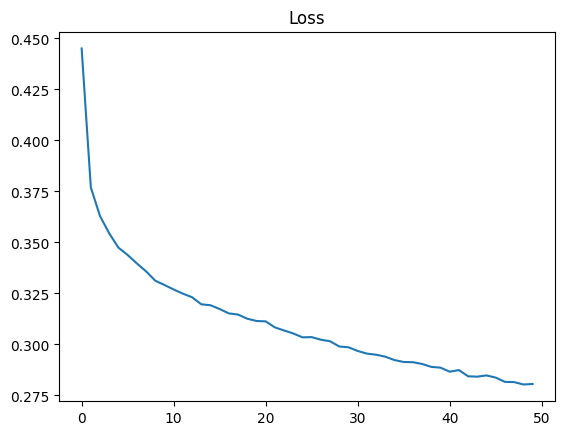

Text(0.5, 1.0, 'Accuracy')

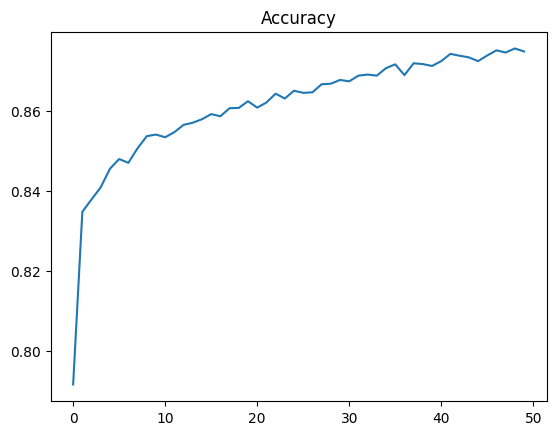

In [82]:
plt.plot(result.history["loss"])
plt.title("Loss")
plt.show()
plt.plot(result.history["accuracy"])
plt.title("Accuracy")

In [83]:
right_pred = model.predict(left_test)

119/119 [==============================] - 0s 2ms/step


In [84]:
right_pred

array([[0.9353489 ],
       [0.619946  ],
       [0.9804873 ],
       ...,
       [0.9975759 ],
       [0.8135393 ],
       [0.01543059]], dtype=float32)

In [86]:
showPrediction(left_test, right_test, right_pred)  # Kommazahlen müssen umgewandelt werden

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,0.935349
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,0.619946
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,0.980487
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,0.950793
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,0.737163
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,0.930186
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,0.997576
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,0.813539


In [88]:
(right_pred >= 0.5).astype(int)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [90]:
predictions = showPrediction(left_test, right_test, (right_pred >= 0.5).astype(int))

In [92]:
predictions

,0,1,2,3,4,5,6,7,8,9,Actual,Prediction
0,-0.572785,-0.210295,-0.279486,-0.133721,0.072070,-0.117242,0.197719,-0.759115,-0.333016,-0.706782,1,1
1,-0.959919,-0.564540,-1.168856,1.788345,1.443140,-0.229956,-0.050589,0.496662,-0.463020,-0.358714,1,1
2,-0.189344,-0.265778,-0.181757,-0.670785,-0.676031,0.756421,0.458011,0.567576,-0.890454,-0.185688,1,1
3,0.635881,-0.167795,-0.032605,-0.393785,-0.540095,0.584923,1.163272,-0.397464,-0.708172,0.386860,1,1
4,1.079422,1.952221,2.096079,-1.071261,-0.985715,-0.582833,-1.507554,1.546605,0.120852,1.796905,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3799,-0.563586,-0.661968,-0.882072,1.078087,0.823773,0.491733,0.234242,-0.278902,-0.551559,0.233753,1,1
3800,-0.505499,-0.433487,-0.642233,-0.304183,-0.323136,-0.388878,-0.500972,0.297356,-0.252232,-0.697744,1,1
3801,1.275486,1.428096,2.998252,-1.631818,-1.539364,-0.591273,1.405220,1.293300,-1.050565,1.760694,1,1
3802,-0.951904,-0.609849,-1.533523,2.016174,2.221850,0.285830,-0.336699,-0.445075,1.799931,-0.951662,1,1


In [91]:
eval(predictions)

Accuracy: 0.8625131440588854
Wrong Points: 0.13748685594111462


## Modelle speichern

In [93]:
model.save("Test.keras")

In [95]:
model = tf.keras.saving.load_model("Test.keras")